# Preprocessing data for machine learning

### My Capstone Two project is a univariate time series forecast for sales forecasting of shoe sales.
### Therefore, this will be a time series decomposition into Seasonality, Trend, and Noise

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Shoe_sales_clean.csv",
                  index_col = 'Date',
                  parse_dates = True)
data.head()

,Sales
Date,
2014-01-01,914.4
2014-01-02,1195.1
2014-01-03,1159.6
2014-01-04,1087.5
2014-01-05,876.4


In [4]:
df = data.rename(columns = {'Sales' : 'y'})
df.head()

,y
Date,
2014-01-01,914.4
2014-01-02,1195.1
2014-01-03,1159.6
2014-01-04,1087.5
2014-01-05,876.4


In [5]:
# set Python frequency to Daily
df = df.asfreq('D')
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=1096, freq='D')

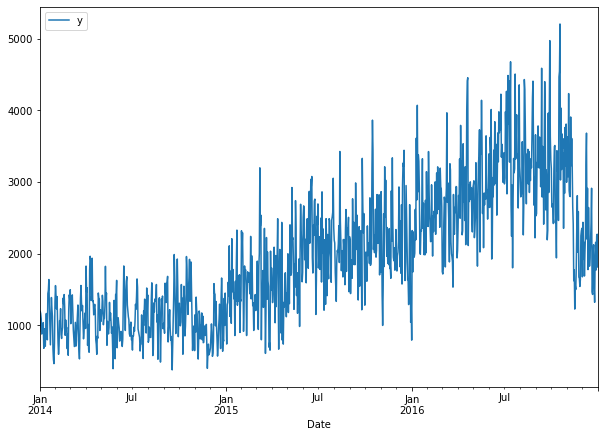

In [6]:
#Visualize the time series
df["y"].plot(figsize = (10, 7), legend = True);

# Seasonal Decomposition

### There are no dummy variables or scalars, however, there is too much noise in this data and it needs to be smoothed out

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

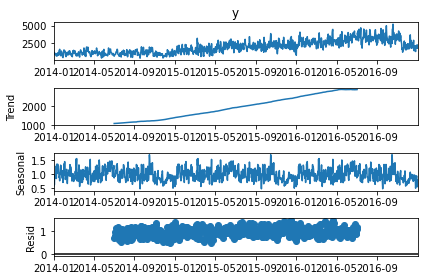

In [12]:
decomposition = seasonal_decompose(x = df.y,
                                   model = 'multiplicative',
                                  period = 365)
decomposition.plot();

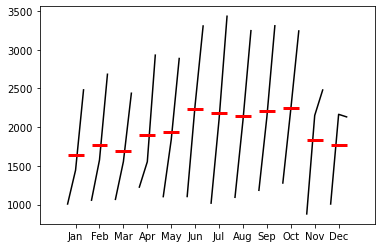

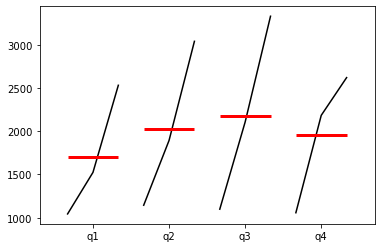

In [13]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(df.y.resample(rule = 'MS').mean())
quarter_plot(df.y.resample(rule = 'Q').mean());

# Split into Training and Test Sets
### Time Series test sets can not be randomized. In our case we will use the last 61 days of our 3 year set as test

In [14]:
test_days = 61
training_set = df.iloc[:-test_days, :]
test_set = df.iloc[-test_days:, :]

In [15]:
training_set.tail()

,y
Date,
2016-10-27,2840.5
2016-10-28,3759.5
2016-10-29,3225.4
2016-10-30,3806.7
2016-10-31,2994.7


In [16]:
test_set.tail()

,y
Date,
2016-12-27,2156.5
2016-12-28,1770.3
2016-12-29,2243.7
2016-12-30,2269.2
2016-12-31,1812.4


In [19]:
print('Training set size:', (training_set.shape))
print('Test set size:',(test_set.shape))

Training set size: (1035, 1)
Test set size: (61, 1)
